# **Task - 1: Prediction using Supervised ML**
## by Chinmayananda Sahu

### **Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope.

Simple linear regression uses traditional slope-intercept form. It’s task is to predict a dependable variable value, let’s say y, based on an independent variable, let’s say X. Hence, X becomes the input and y is the output. This relationship, when plotted on a graph, gives a straight line. Hence, we have to use the equation of a straight line for this, which is 

y = mX + C

Where,
* m -> the coeffecient of X 
* C -> the intercept

Here y and x remains the same and so, all the changes that takes place will be in the slope and the intercept. Thus, there can be multiple straight lines on that basis. What a linear regression algorithm does is it fits the multiple lines along the data points and then returns the line but with the least errors.

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Data Overview

In [2]:
# Read the CSV file 
df = pd.read_csv("C:/Users/Hp/Desktop/TSF/Task 1.csv")
df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape #This gives us the number of rows and coloumns in the dataset

(25, 2)

In [4]:
df.info() #It gives us a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe() #It shows us some Statistical data of the dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

## Data Visualisation

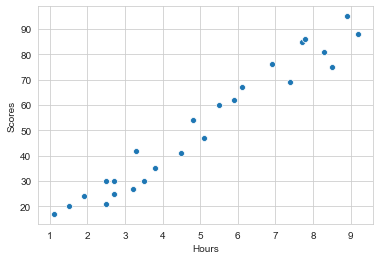

In [8]:
# Plotting a Scatter Plot 
sns.set_style('whitegrid')
sns.scatterplot(data = df, x = 'Hours', y = 'Scores');

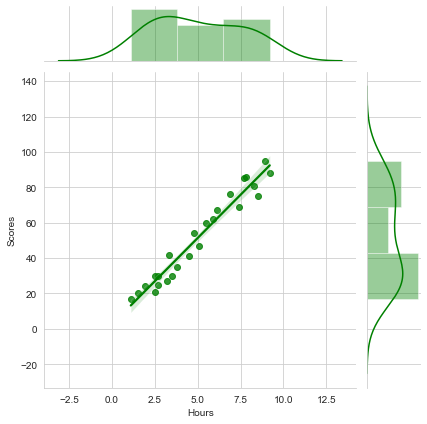

In [9]:
# Plotting a joint plot
sns.jointplot(data = df, x = "Hours", y = "Scores", kind = "reg", color = "g");

*Data points by their "Hours" and "Score" values, along with their independent variable distributions* 

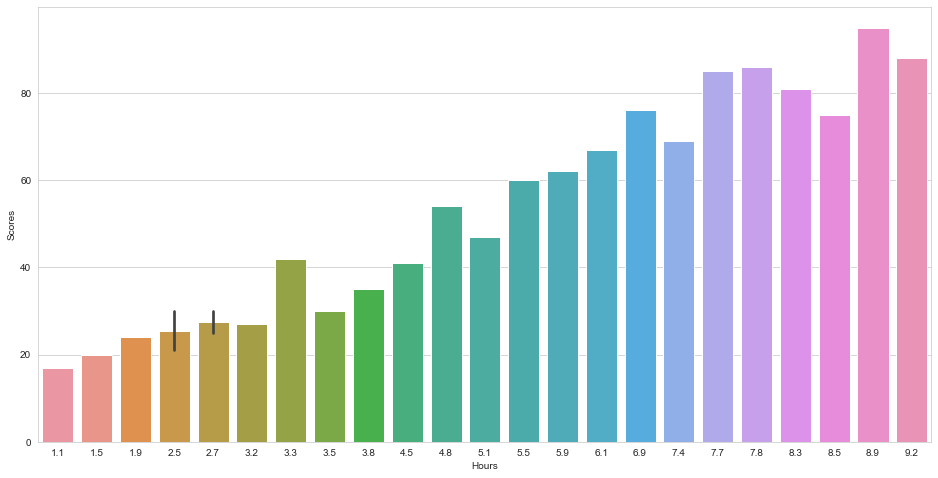

In [10]:
# Plotting a Bar Plot
plt.figure(figsize = (16,8))
sns.barplot(x = 'Hours', y = 'Scores', data = df)

## Data Preparation

Now we have to divide the data in labels and attributes. Labels refer to the dependent variables which need to be predicted and attributes refer to the independent variables. Here we want to predict the Scores by using the values of the Hours. Attribute should include 'Hours' which is the X value and the label with have 'Scores' which is Y value.

In [11]:
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores']).reshape(-1,1)

In [12]:
# Assign 80% of data to the Training set and the rest to the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


## Training the Algorithm & Making Predictions

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train) #Training the Algorithm
print ('Training Completed')
print ('model score: ', regr.score(X_test, y_test))

Training Completed
model score:  0.969902073845527


In [15]:
# We can find the best value for the slope and intercept so that you get the best fit for the data.
print(regr.intercept_) #For retrieving the slope
print(regr.coef_)

[2.16892363]
[[9.71331442]]


In [16]:
# With the algorithm trained, we can now use it to make some predictions of the Scores
y_pred = regr.predict(X_test)
y_pred

array([[20.62422103],
       [88.617422  ],
       [48.79283286],
       [59.47747873],
       [82.78943334]])

In [17]:
# After we find the predicted value, we have to match it with the actual output value
df_new =pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_new

,Actual,Predicted
0,24,20.624221
1,95,88.617422
2,54,48.792833
3,62,59.477479
4,81,82.789433


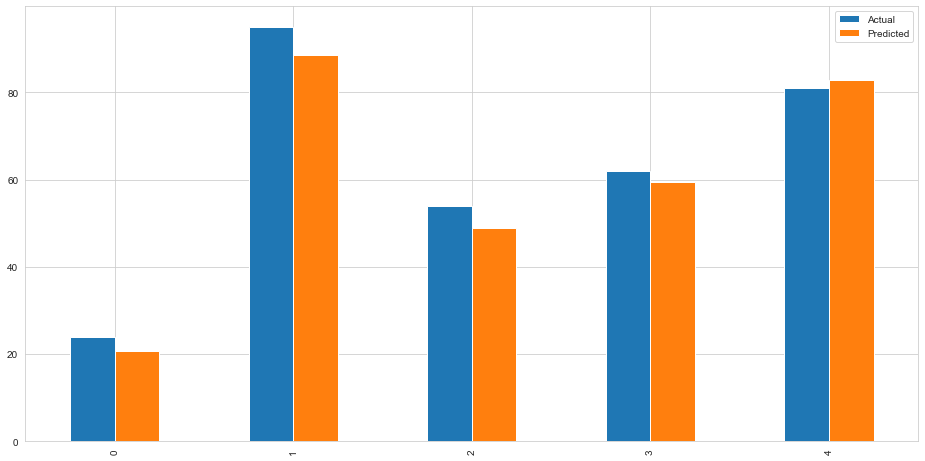

In [18]:
# Plotting bar graph to compare the differences between the predicted and actual outcome.
df_new.plot(kind= 'bar',figsize=(16,8))

**Q: What will be the Predicted score if a student study for 9.25 hour in a day ?**

In [19]:
hours = 9.25
my_pred = regr.predict([[hours]]).round(2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = [92.02]


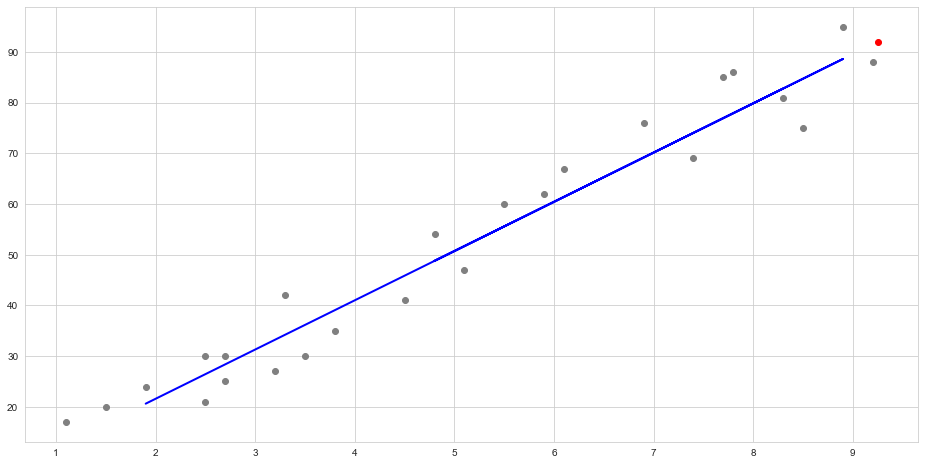

In [20]:
plt.figure(figsize = (16,8))
plt.scatter(df['Hours'], df['Scores'], color='gray')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.scatter(9.25,my_pred, color = 'red');
plt.show()

## Evaluating the Model

Now, we have to examine the performance of the algorithm. Withthis step we can compare how well different models perform on a perticular dataset. These involves certain metrics: 

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 3.8554957451876275
Mean Squared Error: 17.762592099323797
Root Mean Squared Error: 1.9635416331689093


# 